# Practical Lab 1 – Univariate Linear Regression  
## Predicting California Housing Prices

**Student Name:** Krishna Reddy Bovilla  
**Student ID:** 9050861  
**Course:** Foundations of Machine Learning Frameworks  
**Course Code:** CSCN8010  

- **GitHub Repository**: [https://github.com/kittuai/practical-lab1-housing](https://github.com/kittuai/practical-lab1-housing)  
- **Live Webpage (GitHub Pages)**: [https://kittuai.github.io/practical-lab1-housing/](https://kittuai.github.io/practical-lab1-housing/)


## Introduction

In this project, I work with housing data from California to learn how some features are related to house prices.  
I use a basic machine learning method called **linear regression** to build models that predict the **median house value**.

The steps I follow are:
- Load and explore the dataset
- Look at patterns in the data using graphs
- Train simple models using one feature at a time
- Check how well each model works using error scores

This project helps me understand how data can be used to make predictions, and which features are most useful for predicting house prices.


## Framing the Problem

The goal of this report is to explore how certain factors affect housing prices by using simple linear regression models. Specifically, we want to predict the **median house value** in a region using only one variable at a time. This helps us see the individual impact of each factor on housing prices.

We will create three separate models, each using a different input variable:

- **Median income**
- **Population**
- **Number of households**

By comparing these models we can identify which factor impact the median house value most.



## Importing necessary Python libraries for this lab


In [1]:

# (-----------------For data loading and handling--------------------)
import pandas as pd
import numpy as np

# (------------------For data visualization------------------------------)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns

# (------------------------For linear regression model --------------------)
from sklearn.linear_model import LinearRegression

# (--------------------- model evaluation metrics -------------------------) 
from sklearn.metrics import mean_squared_error, mean_absolute_error

# (---------------To display plots inside the notebook---------)
%matplotlib inline


## Getting the Data

The dataset used in this lab is from Kaggle. It contains information about housing in California, including features such as median income, population, number of households, and median house value.

You can find the dataset here:  
[California Housing Prices – Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)


## Loading the California housing dataset

In [2]:
file_path = r"D:\Conestoga\Foundations of Machine Learning Frameworks\lab1-California-housing\housing.csv"

# To Read the CSV file into a pandas DataFrame
housing_data = pd.read_csv(file_path)

# Show the first 5 rows to understand the structure
housing_data.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

##  summary statistics


In [3]:
housing_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

We use the `describe()` function to get a summary of all the numbers in the dataset.  
It shows how many values there are, the average, the smallest and biggest numbers, and some values in between.

## checking missing values

In [4]:
# Check if there are any missing values in the dataset
housing_data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are **no missing values** except in the `total_bedrooms` column.

## filling Missing Values


In [5]:
# (---------------------------filling missing values using median ---------------------------)
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median())
housing_data.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

There were some missing values in the `total_bedrooms` column. I filled them using the **median** value of that column. I assigned the result back to the same column, which avoids future warnings from Pandas.
there are no missing values left in the dataset.

> Note: In this task i was not asked to explore `total_bedrooms` in relation to house prices.  
> However, I believe this feature might be relevant to median house value andit may  play an important role in more advanced analysis

## plot 1: median_income vs median_house_value

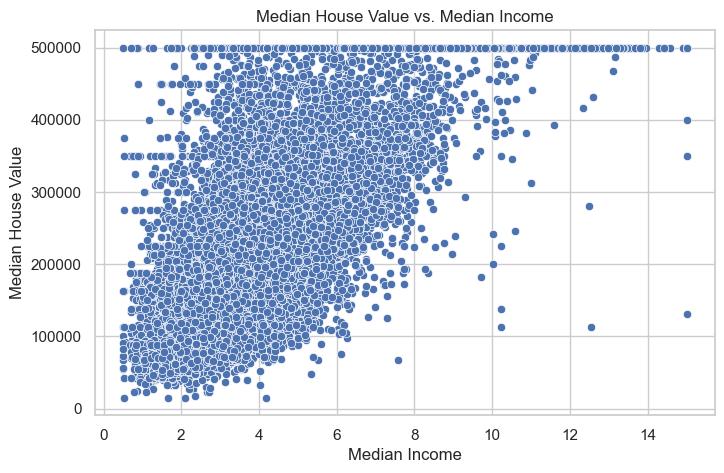

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# (------------- simple style for better visuals -----------------)
sns.set(style="whitegrid")

#  (------------------median_income vs median_house_value -----------------)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="median_income", y="median_house_value", data=housing_data)
plt.title("Median House Value vs. Median Income")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


**Median Income vs Median House Value**:  
   This graph shows a clear upward trend. As income increases, house value also tends to increase. This makes sense because people with higher income can usually afford more expensive houses. We expect this to show a strong positive correlation in our regression.

## plot 2: population vs median_house_value

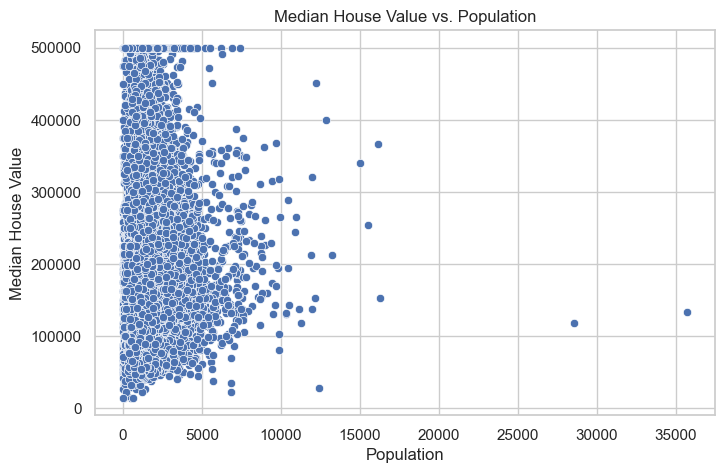

In [7]:
# (------------------------ population vs median_house_value---------------)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="population", y="median_house_value", data=housing_data)
plt.title("Median House Value vs. Population")
plt.xlabel("Population")
plt.ylabel("Median House Value")
plt.show()


 **Population vs Median House Value**:  
   This plot looks very scattered with no clear trend. It seems like population size in a block group does not have a strong or clear effect on house value. There are both high and low house values at all population levels. This may lead to a weak regression model.

## plot3: households vs median_house_value

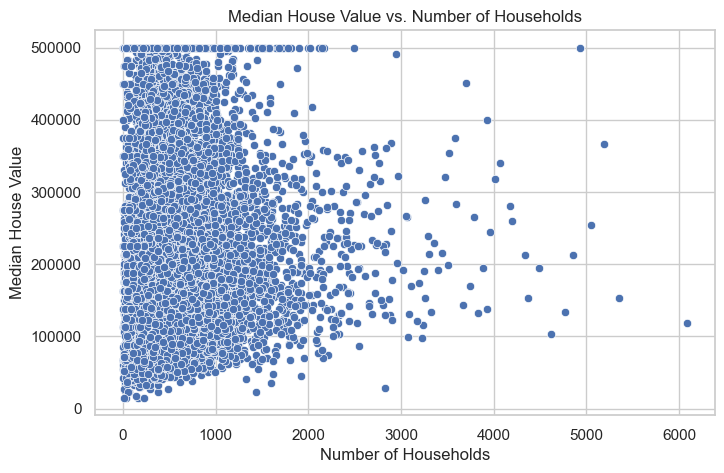

In [8]:
# (---------------households vs median_house_value----------------)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="households", y="median_house_value", data=housing_data)
plt.title("Median House Value vs. Number of Households")
plt.xlabel("Number of Households")
plt.ylabel("Median House Value")
plt.show()


**Number of Households vs Median House Value**:  
   Similar to population, this graph is also widely spread out. There is no obvious linear relationship here either. Some areas with many households have low house values, and some have high values.

   ---

## Description of the 4 Variables Used

In this task, we work with four main variables:

1. **median_house_value** 
   - This is the house price we are trying to predict.  
   - It shows the middle price of houses in a our califoria housing dataset
   - **Range:** \$14,999 to \$500,001

2. **median_income**  
   - This is the average income of people living in that area.  
   - The values are in units of \$10,000 ie so 3 means \$30,000.  
   - **Range:** About 0.5 to 15  which means \$5,000 to \$150,000
   - may be from our above plots we can understad  variable has a better  connection with house prices 
   - practically in real world prespective Areas with higher income usually have higher house values.

3. **population**  
   - This is the total number of people living in the area.  
   - **Range:** 3 to 35,682 people  
   - The data is very spreaded a lot and there’s no clear pattern with house prices. It may not be a good predictor.

4. **households**  
   - This is the number of households ie families  in the area.  
   - **Range:** 1 to 6,082 households  
   - may be just Like population variable , this variable doesn’t show a strong relationship with house value.

---


##  Fitting Three Univariate Linear Regression Models


In [9]:
y = housing_data["median_house_value"]  # our target value 

# Model 1: median_income vs target value
x1 = housing_data[["median_income"]]
model1 = LinearRegression()
model1.fit(x1, y)

# Model 2: population vs target value
x2 = housing_data[["population"]]
model2 = LinearRegression()
model2.fit(x2, y)

# Model 3: households vs target value
x3 = housing_data[["households"]]
model3 = LinearRegression()
model3.fit(x3, y)


LinearRegression()


In this step i  created three simple models to predict house prices.
Each model uses only one feature to try to guess the **median house value**:

- Model 1 uses `median_income`
- Model 2 uses `population`
- Model 3 uses `households`

here i  used a tool called `LinearRegression()` to build each model.  
then  i  trained each model using `.fit()`, which means the model learns from the data.

The `y` variable is what we want to predict: the house price.  
The `x1`, `x2`, and `x3` are the input values we use for each model.

> **Reference:**  
> I used this Stack Overflow thread to better understand how the `fit()` function works and how to plot a linear fit using scikit-learn:  
> [Using scikit-learn LinearRegression to plot a linear fit](https://stackoverflow.com/questions/40941542/using-scikit-learn-linearregression-to-plot-a-linear-fit)


---


## Regression Results: Intercept, Slope, and Error Metrics

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Features and target
x1 = housing_data[['median_income']]
x2 = housing_data[['population']]
x3 = housing_data[['households']]
y = housing_data['median_house_value']

# Train models
model1 = LinearRegression().fit(x1, y)
model2 = LinearRegression().fit(x2, y)
model3 = LinearRegression().fit(x3, y)

# Predict values
y_pred1 = model1.predict(x1)
y_pred2 = model2.predict(x2)
y_pred3 = model3.predict(x3)

# Create a results DataFrame
results_table = pd.DataFrame({
    "Model": ["Income", "Population", "Households"],
    "Intercept": [round(model1.intercept_, 2), round(model2.intercept_, 2), round(model3.intercept_, 2)],
    "Slope": [round(model1.coef_[0], 2), round(model2.coef_[0], 2), round(model3.coef_[0], 2)],
    "MSE": [round(mean_squared_error(y, y_pred1), 2), round(mean_squared_error(y, y_pred2), 2), round(mean_squared_error(y, y_pred3), 2)],
    "MAE": [round(mean_absolute_error(y, y_pred1), 2), round(mean_absolute_error(y, y_pred2), 2), round(mean_absolute_error(y, y_pred3), 2)],
    "R2": [round(r2_score(y, y_pred1), 4), round(r2_score(y, y_pred2), 4), round(r2_score(y, y_pred3), 4)]
})

# Display the summary table
results_table


Model  Intercept     Slope           MSE       MAE      R2
0      Income   45085.58  41793.85  7.011312e+09  62625.93  0.4734
1  Population  210436.26     -2.51  1.330741e+10  91153.82  0.0006
2  Households  196928.58     19.87  1.325778e+10  90802.74  0.0043

### Model Results

I trained three models using median income, population, and households.  
This table shows each model's intercept, slope, and how well it performed using MSE, MAE, and R².  
Lower errors and higher R² mean a better model.


i included **R²** because it helps show how strong the relationship is between

---









## Visualizing Linear Regression Results

In [11]:
# fitting the data into linear regression plots

# to run the interactive grpahs in html file 
pyo.init_notebook_mode(connected=True)

def plot_regression_gl(x_col, y_col, x_label, y_label, title, x_desc, y_desc):
    # Data
    x = housing_data[[x_col]]
    y = housing_data[y_col]

    # Model training
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    # Metrics
    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    # Plot
    fig = go.Figure()

    # Scatter: actual data
    fig.add_trace(go.Scattergl(
        x=x[x_col],
        y=y,
        mode='markers',
        name='Actual Data',
        marker=dict(color='rgba(0, 116, 217, 0.5)', size=5),
        hovertemplate=f"<b>{x_desc}:</b> %{{x}}<br><b>{y_desc}:</b> %{{y}}<extra></extra>"
    ))

    # Line: regression
    fig.add_trace(go.Scattergl(
        x=x[x_col],
        y=y_pred,
        mode='lines',
        name='Regression Line',
        line=dict(color='orange', width=2),
        hovertemplate=f"<b>{x_desc}:</b> %{{x}}<br><b>Predicted {y_desc}:</b> %{{y:.2f}}<extra></extra>"
    ))

    # Annotation box
    annotation_text = (
        f"<b>Intercept:</b> {intercept:.2f}<br>"
        f"<b>Slope:</b> {slope:.2f}<br>"
        f"<b>MSE:</b> {mse:,.2f}<br>"
        f"<b>MAE:</b> {mae:,.2f}"
    )

    fig.add_annotation(
        text=annotation_text,
        xref="paper", yref="paper",
        x=0.75, y=0.15,
        showarrow=False,
        align="left",
        bordercolor="black",
        borderwidth=1,
        borderpad=10,
        bgcolor="white",
        font=dict(size=12),
        opacity=0.9
    )

    # Layout and interactivity
    fig.update_layout(
        title=dict(text=title, font=dict(size=20)),
        xaxis=dict(
            title=dict(text=x_label, font=dict(size=16)),
            showgrid=True,
            zeroline=False
        ),
        yaxis=dict(
            title=dict(text=y_label, font=dict(size=16)),
            showgrid=True,
            zeroline=False
        ),
        hovermode="closest",
        dragmode="zoom",
        margin=dict(t=60),
        height=500,
    )

    # Scroll to zoom enabled
    fig.show(config={'scrollZoom': True})

# Call interactive plots

plot_regression_gl(
    x_col='median_income',
    y_col='median_house_value',
    x_label='Median Income (in $10,000s)',
    y_label='Median House Value (USD)',
    title='Linear Regression: Median Income vs. House Value',
    x_desc='Household Median Income',
    y_desc='House Value'
)

plot_regression_gl(
    x_col='population',
    y_col='median_house_value',
    x_label='Population (per district)',
    y_label='Median House Value (USD)',
    title='Linear Regression: Population vs. House Value',
    x_desc='District Population',
    y_desc='House Value'
)

plot_regression_gl(
    x_col='households',
    y_col='median_house_value',
    x_label='Number of Households (per district)',
    y_label='Median House Value (USD)',
    title='Linear Regression: Number of Households vs. House Value',
    x_desc='Households in District',
    y_desc='House Value'
)


 
 For this part, I used **Plotly** to make interactive graphs for the three models.  
 The instructions said I can use any tool like Matplotlib, Seaborn, or Plotly. I picked Plotly because:
 - It lets me **zoom**, **hover**, and **explore** the chart
 - It's easier to understand the results when the chart is interactive

 I also:
 - Used **Plotly's offline mode**, so the graphs work in the notebook without internet  
 - Used `Scattergl`, which helps the graphs run **faster** with large data
>

>
>**Reference:** 
> Helpful links I used to learn:
> -  Plotly Linear Fits: [https://plotly.com/python/linear-fits/](https://plotly.com/python/linear-fits/)  
> -  Plotly Offline Mode: [https://plotly.com/python/offline/](https://plotly.com/python/offline/)  
> -  Scattergl (for faster charts): [https://plotly.com/python/webgl-vs-svg/](https://plotly.com/python/webgl-vs-svg/)
>
>**Acknowledgment of External Help:**
> - For some parts of this code, I used help from an **ChatGPT & copilot** to better understand how to build the plot and make it more interactive.  
> - i reviewed the code and added comments so I could follow and learn from each step.

## Interactive Regression Graphs

- These graphs show the relationship between each housing feature and house prices.
- You can **hover over the dots** to see the actual values for each data point.
- The **orange line** is the prediction line from the linear regression model.
- This makes it easier to see how well the model fits the data.
- Interactive plots are helpful because you can explore and understand the results better than with simple static images.

---

### Summary and Conclusion

In this project, I built three simple linear regression models to predict **median house value** using one feature at a time:

- Median Income  
- Population  
- Number of Households  

#### Model Comparison ie Goodness-of-Fit:

To compare the models, I looked at three values:
- **MSE (Mean Squared Error):** Lower is better  
- **MAE (Mean Absolute Error):** Lower is better  
- **R² Score:** Higher is better (closer to 1 means better fit)

**1. Median Income Model**  
- Intercept: 45,085.58  
- Slope: 41,793.85  
- MSE: 7,011,312,000  
- MAE: 62,625.93  
- R²: **0.4734**  
- This model gave the **best results**. The R² score of 0.4734 means that about **47% of the variation** in house prices can be explained just by knowing the median income. The error values MSE and MAE were the lowest of all three models.  
The scatter plot showed a clear upward trend — as income goes up, house prices also go up. This makes sense in real life because people with higher income usually live in more expensive areas. This shows that **median income is strongly related to house value.**


**2. Population Model**  
- Intercept: 210,436.26  
- Slope: -2.51  
- MSE: 13,307,410,000  
- MAE: 91,153.82  
- R²: **0.0006**  
This model did **not perform well**. The R² score is very close to zero, which means **population doesn't help much at all** in predicting house prices. The errors were also much higher than the income model. The slope is negative, but very small, so the relationship is weak and probably not meaningful. The scatter plot looked very random, with no clear trend or pattern. That’s why population is **not a good choice on its own**.

**3. Households Model**  
- Intercept: 196,928.58  
- Slope: 19.87  
- MSE: 13,257,780,000  
- MAE: 90,802.74  
- R²: **0.0043**  
- This model also performed **poorly**. The R² score was very low, just 0.0043, so it only explains about **0.4% of the variation** in house prices. The errors were almost the same as the population model.The slope is positive, but the trend was not clear in the scatter plot. Like population, **number of households is not helpful alone** for predicting house value.


#### What I Learned

- **Median Income** is a strong and helpful feature for predicting house prices. This makes sense because people with higher income can afford more expensive homes.
- **Population** and **Households** don’t show a clear pattern with house prices when used by themselves.
- These other features might be more helpful when combined with others in a bigger model like multivariate regression.

#### Conclusion

The model that used **Median Income** was the most accurate and useful.  
It had the best fit, the lowest error, and the highest R² score (0.4734).  
This means it can predict house values much better than the other two features.
